In [1]:
!pip install matplotlib
!pip install pandas
!pip install seaborn
!pip install numpy
!pip install category_encoders
!pip install openpyxl


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\woute\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\woute\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\woute\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\woute\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\woute\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\woute\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import category_encoders as ce

In [3]:
# Load a sheet into a DataFrame by its name
df = pd.read_excel('files/food-twentieth-century-crop-statistics-1900-2017-xlsx.xlsx', sheet_name="CropStats")

In [4]:
# See basic info about our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36707 entries, 0 to 36706
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           36707 non-null  int64  
 1   Harvest_year         36707 non-null  int64  
 2   admin0               36707 non-null  object 
 3   admin1               33716 non-null  object 
 4   crop                 36707 non-null  object 
 5   hectares (ha)        35084 non-null  float64
 6   production (tonnes)  34709 non-null  float64
 7   year                 36707 non-null  int64  
 8   yield(tonnes/ha)     34694 non-null  float64
 9   admin2               0 non-null      float64
 10  notes                5641 non-null   object 
dtypes: float64(4), int64(3), object(4)
memory usage: 3.1+ MB


## Drop columns we don't need

In [5]:
df=df.drop(['Unnamed: 0','admin2','notes'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36707 entries, 0 to 36706
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Harvest_year         36707 non-null  int64  
 1   admin0               36707 non-null  object 
 2   admin1               33716 non-null  object 
 3   crop                 36707 non-null  object 
 4   hectares (ha)        35084 non-null  float64
 5   production (tonnes)  34709 non-null  float64
 6   year                 36707 non-null  int64  
 7   yield(tonnes/ha)     34694 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 2.2+ MB


## remove columns when hecatere, production and yield is incomplete and can't be calculated

In [6]:
# Row 14 and row 17 have all 3 fields as a null value so they should be removed in our dataframe
# df.dropna(subset=['hectares (ha)', 'production (tonnes)', 'yield(tonnes/ha)'], how='all', inplace=True)
# df.head(20)

drop admin1

drop where admin 1 == null

if admin1 == null replace with admin0

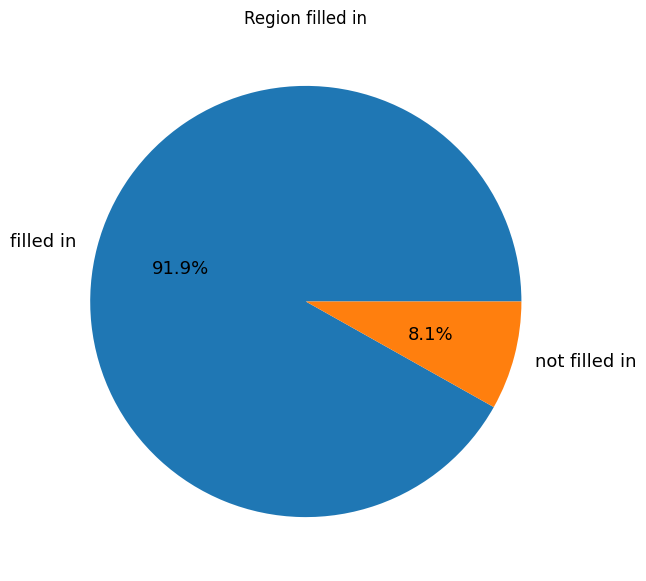

In [7]:
sizes = [df['admin1'].count(),len(df)-df['admin1'].count()]
plt.figure(figsize=(7,7))
plt.title('Region filled in')
plt.pie(sizes,labels=['filled in','not filled in'],autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()

In [8]:
df.loc[df['admin0'] == 'Belgium']

,Harvest_year,admin0,admin1,crop,hectares (ha),production (tonnes),year,yield(tonnes/ha)
116,1902,Belgium,NaN,wheat,NaN,NaN,1902,NaN
117,1903,Belgium,NaN,wheat,NaN,NaN,1903,NaN
118,1904,Belgium,NaN,wheat,NaN,NaN,1904,NaN
119,1905,Belgium,NaN,wheat,NaN,NaN,1905,2.0700
120,1906,Belgium,NaN,wheat,NaN,NaN,1906,2.3500
...,...,...,...,...,...,...,...,...
227,2013,Belgium,NaN,wheat,201854.0,1803550.0,2013,8.9349
228,2014,Belgium,NaN,wheat,211900.0,1994600.0,2014,9.4129
229,2015,Belgium,NaN,wheat,201628.0,2019347.0,2015,10.0152
230,2016,Belgium,NaN,wheat,206284.0,1400074.0,2016,6.7871


In [9]:
df_BelgiumNullValues=df.loc[df['admin0'] == 'Belgium']
print('The amount of filled in regions in Belgium:',df_BelgiumNullValues['admin1'].count())

The amount of filled in regions in Belgium: 0


In [10]:
df_replaceAdmin1 = df.copy()
df_replaceAdmin1['admin1'].fillna(df['admin0'], inplace=True)
df_replaceAdmin1


,Harvest_year,admin0,admin1,crop,hectares (ha),production (tonnes),year,yield(tonnes/ha)
0,1902,Austria,Austria,wheat,NaN,NaN,1902,1.310000
1,1903,Austria,Austria,wheat,NaN,NaN,1903,1.470000
2,1904,Austria,Austria,wheat,NaN,NaN,1904,1.270000
3,1905,Austria,Austria,wheat,NaN,NaN,1905,1.330000
4,1906,Austria,Austria,wheat,NaN,NaN,1906,1.280000
...,...,...,...,...,...,...,...,...
36702,2013,China,zhejiang,wheat,75520.0,278300.0,2013,3.685117
36703,2014,China,zhejiang,wheat,82120.0,309500.0,2014,3.768875
36704,2015,China,zhejiang,wheat,89800.0,351300.0,2015,3.912027
36705,2016,China,zhejiang,wheat,76590.0,253900.0,2016,3.315054


In [11]:
df_transformed = df_replaceAdmin1.copy()

Hier gaan we kijken of er plekken zijn waar we de yield nog kunnen berekenen aan de hand van de hectaren en de production.

In [12]:
df_transformed.loc[df_transformed['hectares (ha)'].notna()][df_transformed['production (tonnes)'].notna()][df_transformed['yield(tonnes/ha)'].isna()][df_transformed['hectares (ha)'] != 0]

C:\Users\woute\AppData\Local\Temp\ipykernel_16388\1479177890.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_transformed.loc[df_transformed['hectares (ha)'].notna()][df_transformed['production (tonnes)'].notna()][df_transformed['yield(tonnes/ha)'].isna()][df_transformed['hectares (ha)'] != 0]


,Harvest_year,admin0,admin1,crop,hectares (ha),production (tonnes),year,yield(tonnes/ha)
2460,2017,Australia,Northern Territory,wheat,1.120000e+02,0.0,2017,NaN
2593,2005,Australia,Australian Capital Territory,wheat,2.000000e+02,0.0,2005,NaN
2594,2006,Australia,Australian Capital Territory,wheat,1.000000e+02,0.0,2006,NaN
2595,2007,Australia,Australian Capital Territory,wheat,1.000000e+02,0.0,2007,NaN
2596,2008,Australia,Australian Capital Territory,wheat,1.000000e+02,0.0,2008,NaN
...,...,...,...,...,...,...,...,...
34542,1941,China,yunnan,maize,2.860667e+05,0.0,1941,NaN
34628,1940,China,zhejiang,maize,7.873333e+04,0.0,1940,NaN
34629,1941,China,zhejiang,maize,8.013333e+04,0.0,1941,NaN
34897,1948,China,gansu,wheat,1.189600e+06,0.0,1948,NaN


We hebben de yield ingevuld waarbij de hectaren en de productie waardes hadden.

In [13]:
for index, row in df_transformed.iterrows():
    if pd.notna(row['hectares (ha)']) and pd.notna(row['production (tonnes)']) and pd.isna(row['yield(tonnes/ha)']) and row['hectares (ha)'] != 0:
        df_transformed.at[index, 'yield(tonnes/ha)'] = row['production (tonnes)'] / row['hectares (ha)']
df_transformed

,Harvest_year,admin0,admin1,crop,hectares (ha),production (tonnes),year,yield(tonnes/ha)
0,1902,Austria,Austria,wheat,NaN,NaN,1902,1.310000
1,1903,Austria,Austria,wheat,NaN,NaN,1903,1.470000
2,1904,Austria,Austria,wheat,NaN,NaN,1904,1.270000
3,1905,Austria,Austria,wheat,NaN,NaN,1905,1.330000
4,1906,Austria,Austria,wheat,NaN,NaN,1906,1.280000
...,...,...,...,...,...,...,...,...
36702,2013,China,zhejiang,wheat,75520.0,278300.0,2013,3.685117
36703,2014,China,zhejiang,wheat,82120.0,309500.0,2014,3.768875
36704,2015,China,zhejiang,wheat,89800.0,351300.0,2015,3.912027
36705,2016,China,zhejiang,wheat,76590.0,253900.0,2016,3.315054


Hier kunnen we zien dat de yield 0 is. Dit komt omdat er ook geen production was ook al zijn er wel gewassen geplant (De gewassen kunnen bijvoorbeeld vernield zijn door een storm).

In [14]:
df_transformed.loc[df_transformed['yield(tonnes/ha)'] == 0]

,Harvest_year,admin0,admin1,crop,hectares (ha),production (tonnes),year,yield(tonnes/ha)
2460,2017,Australia,Northern Territory,wheat,1.120000e+02,0.0,2017,0.0
2593,2005,Australia,Australian Capital Territory,wheat,2.000000e+02,0.0,2005,0.0
2594,2006,Australia,Australian Capital Territory,wheat,1.000000e+02,0.0,2006,0.0
2595,2007,Australia,Australian Capital Territory,wheat,1.000000e+02,0.0,2007,0.0
2596,2008,Australia,Australian Capital Territory,wheat,1.000000e+02,0.0,2008,0.0
...,...,...,...,...,...,...,...,...
34542,1941,China,yunnan,maize,2.860667e+05,0.0,1941,0.0
34628,1940,China,zhejiang,maize,7.873333e+04,0.0,1940,0.0
34629,1941,China,zhejiang,maize,8.013333e+04,0.0,1941,0.0
34897,1948,China,gansu,wheat,1.189600e+06,0.0,1948,0.0


Waar de yield niet ingevuld was hebben we aan de hand van backwards fill deze kunnen opvullen. We hebben opgemerkt dat de meeste missing values zich voordoen in de vroegere jaren. Daarom hebben we voor backwards fill gekozen zodat als er van land veranderd wordt zodat er zo wijnig mogelijk met het andere land rekening gehouden wordt.

In [15]:
df_transformed['yield(tonnes/ha)'].bfill(inplace=True)

df_transformed.head(20)

,Harvest_year,admin0,admin1,crop,hectares (ha),production (tonnes),year,yield(tonnes/ha)
0,1902,Austria,Austria,wheat,NaN,NaN,1902,1.31
1,1903,Austria,Austria,wheat,NaN,NaN,1903,1.47
2,1904,Austria,Austria,wheat,NaN,NaN,1904,1.27
3,1905,Austria,Austria,wheat,NaN,NaN,1905,1.33
4,1906,Austria,Austria,wheat,NaN,NaN,1906,1.28
5,1907,Austria,Austria,wheat,NaN,NaN,1907,1.37
6,1908,Austria,Austria,wheat,NaN,NaN,1908,1.36
7,1909,Austria,Austria,wheat,NaN,NaN,1909,1.35
8,1910,Austria,Austria,wheat,NaN,NaN,1910,1.18
9,1911,Austria,Austria,wheat,NaN,NaN,1911,1.37


Nu hebben hectaren en production niet heel veel meerwaarde omdat de yield is wat we gaan willen predicten.

In [16]:
df_transformed=df_transformed.drop(['hectares (ha)','production (tonnes)'], axis=1)
df_transformed

,Harvest_year,admin0,admin1,crop,year,yield(tonnes/ha)
0,1902,Austria,Austria,wheat,1902,1.310000
1,1903,Austria,Austria,wheat,1903,1.470000
2,1904,Austria,Austria,wheat,1904,1.270000
3,1905,Austria,Austria,wheat,1905,1.330000
4,1906,Austria,Austria,wheat,1906,1.280000
...,...,...,...,...,...,...
36702,2013,China,zhejiang,wheat,2013,3.685117
36703,2014,China,zhejiang,wheat,2014,3.768875
36704,2015,China,zhejiang,wheat,2015,3.912027
36705,2016,China,zhejiang,wheat,2016,3.315054


## Self chosen model
For the crop dataset we found that the best models you can make to predict are regression models and decision tree models. For this assignement we chose to create a decision tree model. 

### Import libraries

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

### First I need to transform my dataset because the dataset contains string values and a decision tree model prefers to only using numerical values. Since they are not categorical values I will use one-hot encoding to transform these string values to numerical values.

In [18]:
# Create an instance of OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the data
encoded_data = encoder.fit_transform(df_transformed[['admin0', 'admin1', 'crop']])

# Convert the encoded data to a pandas DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['admin0', 'admin1', 'crop']))

# Get the numerical columns to concatenate with the one-hot encoded df 
df_numerical = df_transformed.drop(['admin0', 'admin1', 'crop'], axis=1)

# Concatenate the encoded data with the original numerical data
final_df = pd.concat([encoded_df, df_numerical], axis=1)

# Print the encoded data
final_df

,admin0_Argentina,admin0_Australia,admin0_Austria,admin0_Belgium,admin0_Brazil,admin0_Canada,admin0_Chile,admin0_China,admin0_Croatia,admin0_Czech Republic,...,admin1_zhejiang,admin1_Île-de-France,crop_cereals,crop_maize,crop_spring wheat,crop_wheat,crop_winter wheat,Harvest_year,year,yield(tonnes/ha)
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1902,1902,1.310000
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1903,1903,1.470000
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1904,1904,1.270000
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1905,1905,1.330000
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1906,1906,1.280000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2013,2013,3.685117
36703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2014,2014,3.768875
36704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2015,2015,3.912027
36705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2016,2016,3.315054


### First we start with selecting our features and target.
We want to predict the yield(tonnes/ha) so we drop them from our features list and set it as our target y.

In [19]:
X = final_df.drop('yield(tonnes/ha)', axis=1)
y = final_df['yield(tonnes/ha)']

### Then we split our dataset into a training and test set.
We split our data for 80% into a training set and for 20% into a test set.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Here we show the first 10 rows of our training feature set.

In [21]:
X_train.head(10)

,admin0_Argentina,admin0_Australia,admin0_Austria,admin0_Belgium,admin0_Brazil,admin0_Canada,admin0_Chile,admin0_China,admin0_Croatia,admin0_Czech Republic,...,admin1_yunnan,admin1_zhejiang,admin1_Île-de-France,crop_cereals,crop_maize,crop_spring wheat,crop_wheat,crop_winter wheat,Harvest_year,year
4282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1972,1972
29199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1915,1915
13630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1970,1970
25052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2017,2017
10726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2014,2014
16233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1907,1907
28559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1931,1931
28209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1941,1941
18490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2003,2003
13783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1966,1966


Here we show the first 10 rows of our training target set.

In [22]:
y_train.head(10)

4282      0.812162
29199     1.277778
13630     2.488305
25052     3.093568
10726    10.152201
16233     1.143275
28559     0.807018
28209     2.084796
18490     7.030123
13783     2.589182
Name: yield(tonnes/ha), dtype: float64

### Create decisiontree model
We create our decision tree model.

In [23]:
model = DecisionTreeRegressor()

### Train the model
Here we train our model with our train dataset to prepare it for making predictions. 

In [24]:
model.fit(X_train, y_train)

DecisionTreeRegressor()

## Test the model
Now we test our model using our test dataset.

In [25]:
# Maak voorspellingen op de testgegevens
y_pred = model.predict(X_test)

## Accuracy of model
As you can see we get an accuracy of +- 76% with our decision tree model. 

In [26]:
# Convert to discrete values
y_pred_discrete = [int(round(x)) for x in y_pred]
y_test_discrete = [int(round(x)) for x in y_test]

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test_discrete, y_pred_discrete)
print("Accuracy:", accuracy)

Accuracy: 0.7598746935439935


## We save the model in a folder
We can save a created model in a folder by using the pickle.dump() function. Now our model will be saved in the files folder so we can use it again later on.

In [27]:
import pickle

# Save the model to disk
filename = 'files/cropdata_chosen_model.sav'
pickle.dump(model, open(filename, 'wb'))


## Load model from folder
To load a model from a folder we can use the pickle.load() function. Now we can use the decision tree model that we made above.

In [28]:
# Load the model from disk
filename = 'files/cropdata_chosen_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model

DecisionTreeRegressor()

# AWS Model

First we are going to import all the libraries we will need.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sagemaker.image_uris import retrieve
import sagemaker
from sagemaker import get_execution_role
import boto3
from sagemaker.amazon.amazon_estimator import get_image_uri
import numpy as np
import pandas as pd
import io
import os

ModuleNotFoundError: No module named 'sagemaker'

This is the dataframe we are going to use to make our model.

In [ ]:
df_transformed

,Unnamed: 0,Harvest_year,admin0,admin1,crop,year,yield(tonnes/ha)
0,0,1902,Austria,Austria,wheat,1902,1.310000
1,1,1903,Austria,Austria,wheat,1903,1.470000
2,2,1904,Austria,Austria,wheat,1904,1.270000
3,3,1905,Austria,Austria,wheat,1905,1.330000
4,4,1906,Austria,Austria,wheat,1906,1.280000
...,...,...,...,...,...,...,...
36702,36702,2013,China,zhejiang,wheat,2013,3.685117
36703,36703,2014,China,zhejiang,wheat,2014,3.768875
36704,36704,2015,China,zhejiang,wheat,2015,3.912027
36705,36705,2016,China,zhejiang,wheat,2016,3.315054


Xgb needs the value we want to predict in the first slot. So we have to move our yield from last to the first column.

In [ ]:
cols = df_transformed.columns.tolist()
cols = cols[-1:]+cols[:-1]
df_model = df_transformed[cols]
df_model

,yield(tonnes/ha),Unnamed: 0,Harvest_year,admin0,admin1,crop,year
0,1.310000,0,1902,Austria,Austria,wheat,1902
1,1.470000,1,1903,Austria,Austria,wheat,1903
2,1.270000,2,1904,Austria,Austria,wheat,1904
3,1.330000,3,1905,Austria,Austria,wheat,1905
4,1.280000,4,1906,Austria,Austria,wheat,1906
...,...,...,...,...,...,...,...
36702,3.685117,36702,2013,China,zhejiang,wheat,2013
36703,3.768875,36703,2014,China,zhejiang,wheat,2014
36704,3.912027,36704,2015,China,zhejiang,wheat,2015
36705,3.315054,36705,2016,China,zhejiang,wheat,2016


Here we can also see the order of the columns.

In [ ]:
df_model.columns

Index(['yield(tonnes/ha)', 'Unnamed: 0', 'Harvest_year', 'admin0', 'admin1',
       'crop', 'year'],
      dtype='object')

We split our dataset into a training set, a validation set and a test set.

In [ ]:
train, test_and_validate = train_test_split(df_model, test_size=0.2, random_state=42, stratify=df_model['Harvest_year'])

In [ ]:
test, validate = train_test_split(test_and_validate, test_size=0.5, random_state=42)

Now we will print the shape of all the sets. As you can see all the sets have the same amount of columns.

In [ ]:
print(train.shape)
print(test.shape)
print(validate.shape)

(29365, 7)
(3671, 7)
(3671, 7)


Now we will create a S3 bucket and upload our data to that bucket. I do this because we need our data inside a bucket to make our model.

In [ ]:
s3 = boto3.client('s3')
bucket='cropdata-bucket'

prefix='datawizards'

train_file='train.csv'
test_file='test.csv'
validate_file='validate.csv'

s3_resource = boto3.Session().resource('s3')

s3.create_bucket(Bucket=bucket)

def upload_s3_csv(filename, folder, dataframe):
    csv_buffer = io.StringIO()
    dataframe.to_csv(csv_buffer, header=False, index=False)
    s3_resource.Bucket(bucket).Object(os.path.join(prefix, folder, filename)).put(Body=csv_buffer.getvalue())

We upload our train, validate and test set to our bucket using the definition we created before.

In [ ]:
upload_s3_csv(train_file, 'train', train)
upload_s3_csv(test_file, 'test', test)
upload_s3_csv(validate_file, 'validate', validate)

Now it is time to train our model. We retrieve the xgboost inside the container.

In [ ]:
container = retrieve('xgboost', boto3.Session().region_name,'1.0-1')

We enter the hyperparameters so we can create a regression model.

In [ ]:
hyperparams={
    "num_round":"42",
    "eval_metric":"rmse,mae",
    "objective": "reg:squarederror"
}

Now we can make the model using the container and hyperparameter we have created. we also have to define the path towards our S3 bucket.

In [ ]:
s3_output_location="s3://{}/{}/output/".format(bucket,prefix)
xgb_model=sagemaker.estimator.Estimator(container,
                                        sagemaker.get_execution_role(),
                                        instance_count=1,
                                        instance_type='ml.m4.xlarge',
                                        output_path=s3_output_location,
                                        hyperparameters=hyperparams,
                                        sagemaker_session=sagemaker.Session()
                                       )

Then we define the training data and the validation data.

In [ ]:
train_channel = sagemaker.inputs.TrainingInput("s3://{}/{}/train/".format(bucket,prefix,train_file),
                                               content_type='text/csv'
                                              )

validate_channel = sagemaker.inputs.TrainingInput("s3://{}/{}/validate/".format(bucket,prefix,validate_file),
                                               content_type='text/csv'
                                              )

data_channels = {'train': train_channel, 'validation': validate_channel}

And after all these steps we can train our model by using the training and validation data we just defined.

In [ ]:
xgb_model.fit(inputs=data_channels,logs=False)

Now that the model has been created we can deploy it.

In [ ]:
xgb_predictor = xgb_model.deploy(
    initial_instance_count=1,
    instance_type='ml.m4.xlarge',
    serializer=sagemaker.serializers.CSVSerializer(),
    deserializer=sagemaker.deserializers.CSVDeserializer()
)

Once the model has been deployed we can use our test data to test how accurate the model actually is.

In [ ]:
test_data_bytes = test.to_csv(index=False, header=False).encode('utf-8')
predictions = xgb_predictor.predict(test_data_bytes)

actual_values = test['yield(tonnes/ha)']
rmse = np.sqrt(mean_squared_error(actual_values, predictions))
print("Root Mean Squared Error:", rmse)